# Data visualization with Python
In the last sessions, we learned the basics of **Pandas**. It became clear that we often only fully understand data once we visualize it meaningfully. **Visualizations** help us to recognize patterns, trends or anomalies in the data more quickly.
In this chapter, we will focus on how we can visualize data in Python, in particular using the **Matplotlib** library. The aim is to convey the basic structure and procedure for creating plots. The comprehensive topic of data visualization will only be touched on briefly here, as it is too extensive for a single chapter. We will focus on some of the most common forms of representation, which (1) cover only a small part of the possibilities and (2) are to be understood as an introduction. In the coming semesters, we will delve deeper into these topics and learn new approaches to visualization.
### Various libraries for data visualization
There are a variety of libraries for data visualization in Python. Some of the most common are:
**Matplotlib**: One of the most basic and flexible libraries, on which many others are based.
**Pandas**: Offers integrated plotting functions, but these are completely based on Matplotlib.
**Seaborn**: Is based on Matplotlib, but offers more beautiful standard plots and some advanced statistical visualizations.
- **Plotnine**: Based on the “Grammar of Graphics” and thus follows a logic more akin to the ggplot library popular in “R”.
- **Bokeh**: Enables the creation of interactive and dynamic visualizations for the web.
- **Plotly**: A powerful library for interactive, web-based visualizations that is often used for dashboards.
### Dynamic vs. static
visualizations in Python can be divided into two main categories:
**Static visualizations**: These are created using libraries such as **Matplotlib**, **Pandas** or **Seaborn**. They are ideal for presentations and reports because they contain no interactive elements.
**Dynamic visualizations**: Libraries such as **Bokeh** and **Plotly** enable the creation of interactive plots in which users can, for example, zoom in, display details or update the display in real time. These are particularly suitable for dashboards and web-based applications.
### Why use Matplotlib?
Matplotlib is not always the first choice when it comes to simple and fast visualizations. Some common opinions from the data science community:
- **Not so fancy, not so pretty**: There are libraries that offer more aesthetically pleasing standard plots (e.g. Seaborn or Plotly). However, this does not mean that Matplotlib cannot create attractive visualizations.
- **Cumbersome and low-level**: Compared to Pandas or Seaborn, Matplotlib requires more effort to create plots because it is very low-level. This means that you have to do more manual work to achieve the desired results.
Nevertheless, there are many reasons why we are focusing on Matplotlib here:
**Flexibility**: Matplotlib can create almost any type of (static) visualization. It offers complete control over all aspects of a plot.
**Foundation for Pandas and Seaborn**: Many other libraries, such as Pandas or Seaborn, are built on top of Matplotlib. Therefore, it makes sense to familiarize yourself with the basics of Matplotlib.
**Large user and developer community:** Matplotlib has a very large and active community, which means that many resources, tutorials, and support are available online.
For these reasons, we will use Matplotlib as a basis before moving on to more dynamic libraries such as Bokeh or Plotly in other courses later on.

## Introduction

### Matplotlib
Matplotlib is the most-used library in Python for creating static plots. You can find documentation [here](https://matplotlib.org/stable/index.html).
We will be working mainly with the `pyplot` submodule here. This can be used to quickly create simple plots:

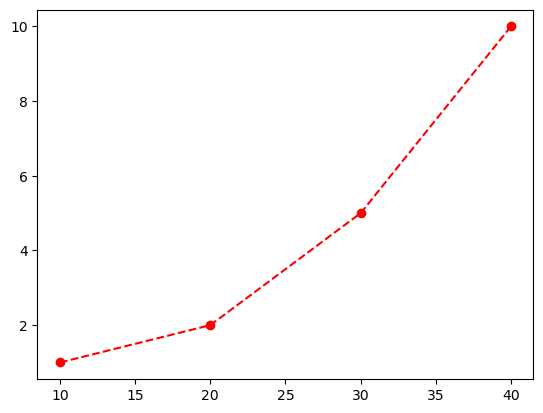

In [2]:
from matplotlib import pyplot as plt

plt.plot(
    [10, 20, 30, 40],
    [1, 2, 5, 10],
    "ro--"
)
plt.show()

### Input data
- Matplotlib can process numerical data from lists, numpy, arrays, pandas data frames, among others.
- If only an array is passed to `plt.plot(),` matplotlib assumes that x = [0, 1, 2...]

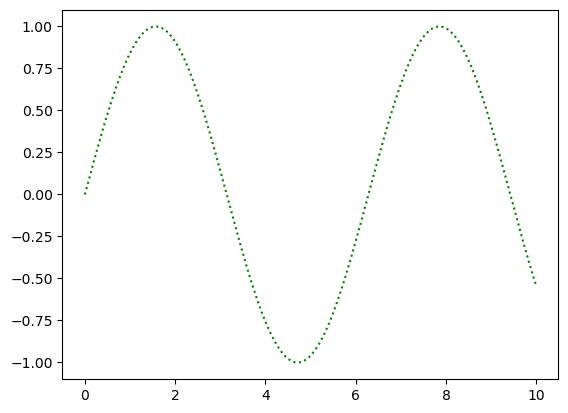

In [3]:
import numpy as np

x = np.arange(0, 10, 0.01)

plt.plot(x, np.sin(x), "g:")
# test yourself: plt.plot(np.sin(x), "g:")
plt.show()


## “Anatomy of a figure” - How is a Matplotlib figure structured?
In the first examples, we worked directly with `plt.plot(). This requires only a few lines of code and quickly gives us first results.
But there are two fundamentally different approaches to creating graphics with Matplotlib!
1. `pyplot` interface (or: functional interface)
2. Object-oriented interface
The pyplot approach is modeled on the MATLAB software and is generally good for simple plots. However, as soon as we want to create more complex graphics, we quickly reach our limits. That is why we will work primarily with the object-oriented approach in the following, even if it seems a bit more complicated at first glance.

In Matplotlib, the final graphics are figure objects. These objects *contain* all the other objects in the graphic (the so-called artists). These can include many different things, as can be seen in the following plot created with Matplotlib:

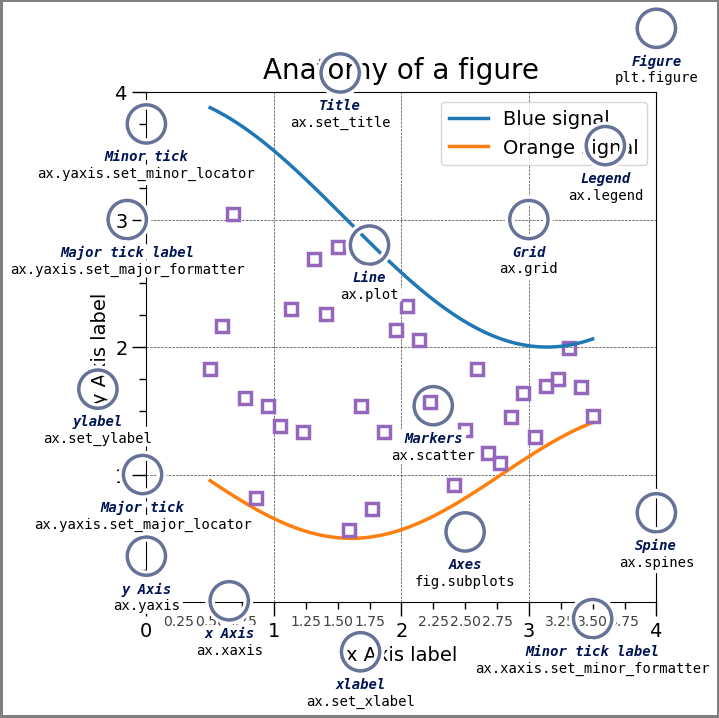

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure
np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure
def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

A brief comparison:
### `pyplot` approach
Matplotlib also creates a figure here, even though we have not defined one. The function plot() does this for us, so to speak. At the same time, however, we have less control over the finer points of layout, etc.

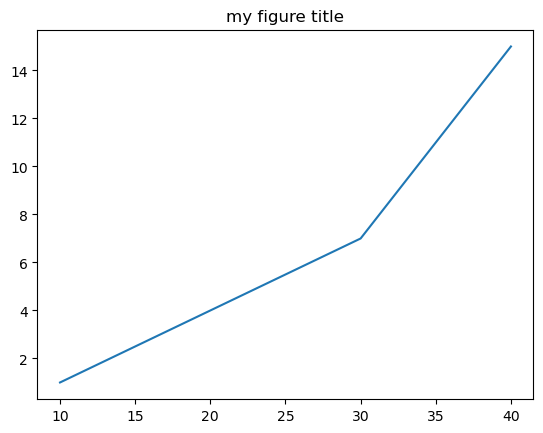

In [5]:
from matplotlib import pyplot as plt

plt.plot(
    [10, 20, 30, 40],
    [1, 4, 7, 15]
)
plt.title("my figure title")
plt.show()

### Objekt-orientierter Ansatz

Hier erzeugen wir explizit ein `Figure` und ein `Axes` Objekt.

Text(0.5, 1.0, 'my figure title')

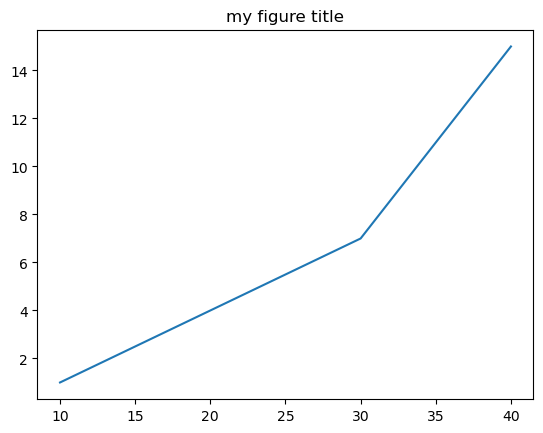

In [6]:
fig, ax = plt.subplots()
ax.plot(
    [10, 20, 30, 40],
    [1, 4, 7, 15]
)
ax.set_title("my figure title")

As you can see here, both approaches produce exactly the same graphic! However, as soon as we want to customize the various elements of the graphic, there are different ways of doing this, depending on which approach we are using. Here we will mainly work with the object-oriented approach.
---
## Plot types
There are **a great** many different data visualization types. It often takes some experience to find the right type for the right question or the right data. Here, we will look at some of the most common types.

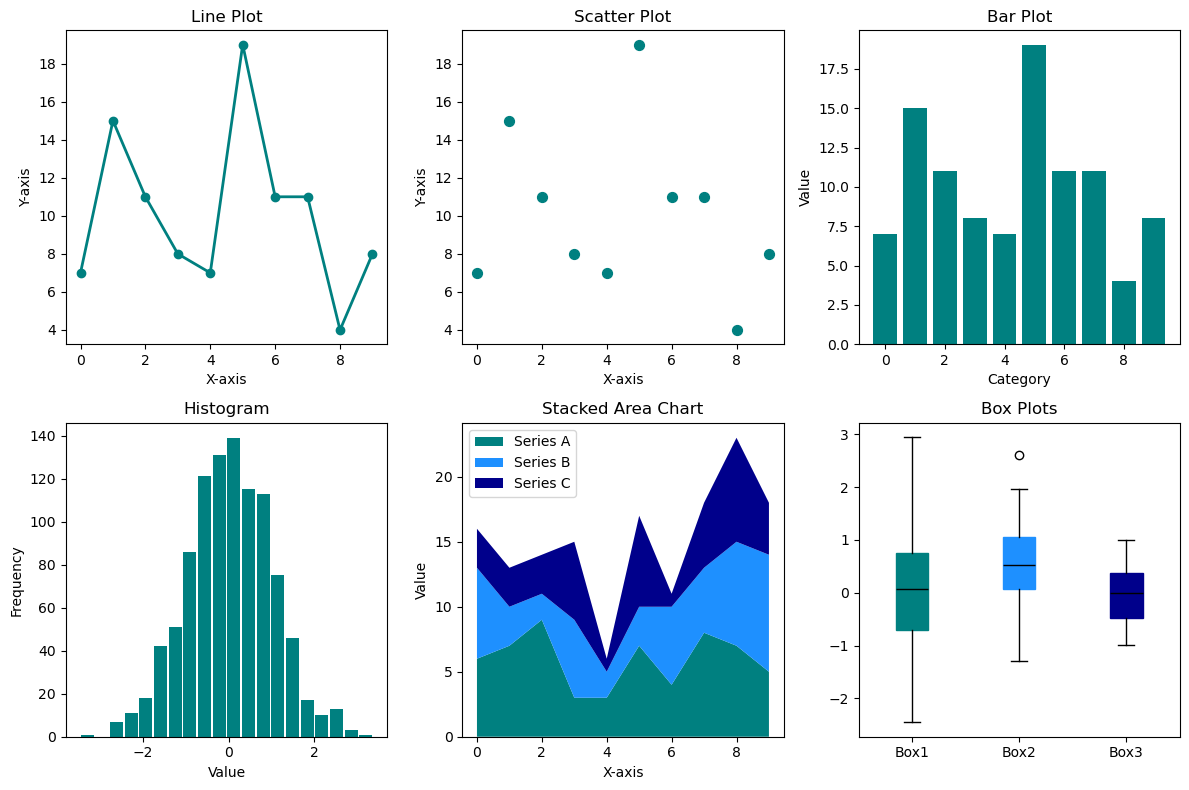

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set a fixed random seed for reproducibility
np.random.seed(42)

# ------------------------------------------------------------------------
# 1. Data for line, scatter, and bar plots
# ------------------------------------------------------------------------
x = np.arange(10)
y = np.random.randint(1, 20, 10)

# ------------------------------------------------------------------------
# 2. Data for histogram
# ------------------------------------------------------------------------
data_hist = np.random.randn(1000)

# ------------------------------------------------------------------------
# 3. Data for stacked area chart (three rows, 10 columns)
# ------------------------------------------------------------------------
data_area = np.random.randint(1, 10, size=(3, 10))

# ------------------------------------------------------------------------
# 4. Data for three boxplots
# ------------------------------------------------------------------------
data_box1 = np.random.randn(100)
data_box2 = 0.4 + 0.7 * np.random.randn(50)
data_box3 = np.random.uniform(-1, 1, 100)

# ------------------------------------------------------------------------
# Create the 2x3 figure
# ------------------------------------------------------------------------
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# A single color (teal) for line/scatter/bar/histogram
base_color = 'teal'

# 1. Line Plot
axs[0, 0].plot(
    x, y, 
    color=base_color, 
    marker='o', 
    markerfacecolor=base_color, 
    markeredgecolor=base_color,
    linewidth=2
)
axs[0, 0].set_title("Line Plot", fontsize=12)
axs[0, 0].set_xlabel("X-axis")
axs[0, 0].set_ylabel("Y-axis")

# 2. Scatter Plot
axs[0, 1].scatter(
    x, y, 
    color=base_color, 
    s=50
)
axs[0, 1].set_title("Scatter Plot", fontsize=12)
axs[0, 1].set_xlabel("X-axis")
axs[0, 1].set_ylabel("Y-axis")

# 3. Bar Plot
axs[0, 2].barh(
    x, y, 
    color=base_color, 
    edgecolor='none'
)
axs[0, 2].set_title("Bar Plot", fontsize=12)
axs[0, 2].set_xlabel("Category")
axs[0, 2].set_ylabel("Value")

# 4. Histogram (no borders, spaced like a bar plot)
axs[1, 0].hist(
    data_hist, 
    bins=20, 
    color=base_color, 
    edgecolor='none', 
    rwidth=0.9
)
axs[1, 0].set_title("Histogram", fontsize=12)
axs[1, 0].set_xlabel("Value")
axs[1, 0].set_ylabel("Frequency")

# 5. Stacked Area Chart
colors_area = ['teal', 'dodgerblue', 'darkblue']
axs[1, 1].stackplot(
    x, 
    data_area[0], data_area[1], data_area[2],
    labels=['Series A', 'Series B', 'Series C'],
    colors=colors_area
)
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title("Stacked Area Chart", fontsize=12)
axs[1, 1].set_xlabel("X-axis")
axs[1, 1].set_ylabel("Value")

# 6. Three Boxplots (using the same three colors)
colors_box = ['teal','dodgerblue','darkblue']
box = axs[1, 2].boxplot(
    [data_box1, data_box2, data_box3], 
    patch_artist=True
)

# Apply colors to each box
for patch, c in zip(box['boxes'], colors_box):
    patch.set_facecolor(c)
    patch.set_edgecolor(c)

# Optionally, color medians (here set to black or another color)
for median in box['medians']:
    median.set(color='black')

# Whiskers, caps, fliers can remain black (default) or be recolored similarly

# Set x-axis labels for the boxplots
axs[1, 2].set_xticks([1, 2, 3])
axs[1, 2].set_xticklabels(["Box1", "Box2", "Box3"])
axs[1, 2].set_title("Box Plots", fontsize=12)

# ------------------------------------------------------------------------
# Adjust layout and show plot
# ------------------------------------------------------------------------
plt.tight_layout()
plt.show()

### Bar plot
Bar charts are very often used for direct comparisons. The bars can be aligned vertically (`.bar()`) or horizontally (`.barh()`).

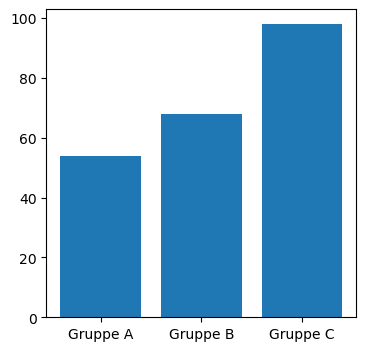

In [ ]:
# Fake data...
names = ['Group A', 'Group B', 'Group C']
values = [54, 68, 98]

# Figure und Axes Objekte erzeugen
fig, ax = plt.subplots(figsize=(4, 4))

# Bar plot in Axes Objekt einzeichnen
ax.bar(names, values)
plt.show()

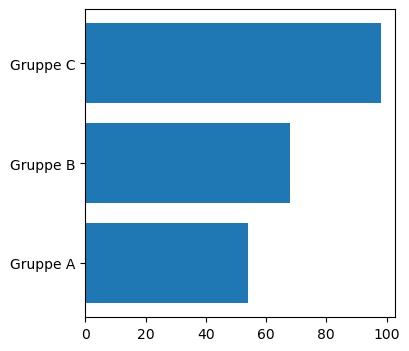

In [10]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.barh(names, values)
plt.show()

### The line plot
Progressions, developments over time, etc. are often represented by line plots. This can be done with 
`ax.plot()` (or `plt.plot()` in the functional approach).

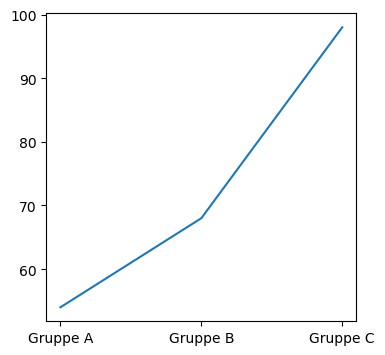

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(names, values)
plt.show()

Although this is possible *technically* in this case (the plot is displayed), a line plot is a very poor solution for this example, namely the comparison of several groups!
Line plots make sense for developments, i.e. over time:

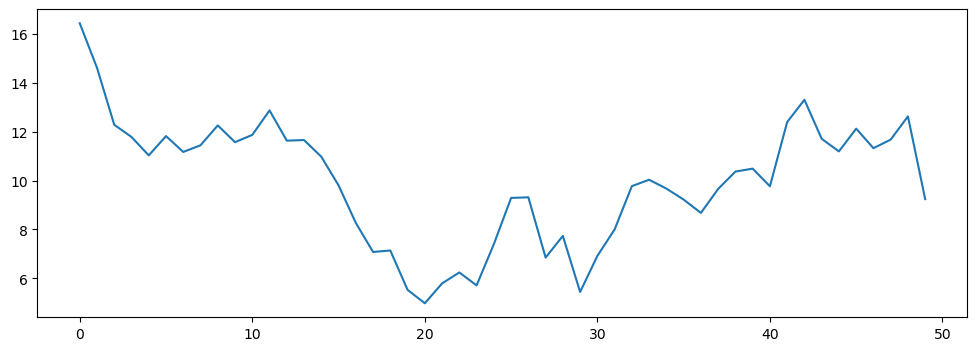

In [12]:
temperature = 18 + np.cumsum(np.random.randn(50))

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(temperature)
plt.show()

### Scatter plot (“scatter plot”)
Scatter plots are mainly used to compare two or more variables. This is possible with `ax.scatter()` (or `plt.scatter()`).

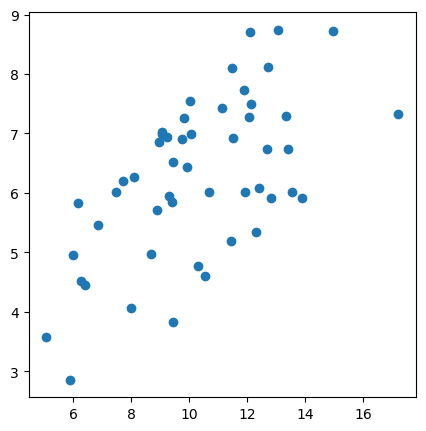

In [14]:
temperature = 18 + np.cumsum(np.random.randn(50))
sunshine = 4 * np.random.rand(50) + 0.4 * temperature

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(temperature, sunshine)
plt.show()

### Pie plot
Even though this type of visualization is frequently seen in everyday life, in most cases there are much more suitable forms! Nonetheless, the pie chart probably belongs in the standard list and can be created with: ax.pie()

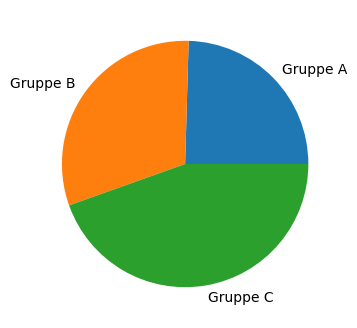

In [15]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(values, labels=names)
plt.show()

### Histogram (frequency distribution)
Distributions of certain variables or measured values can often be well represented by a histogram, i.e. via `.hist()`.

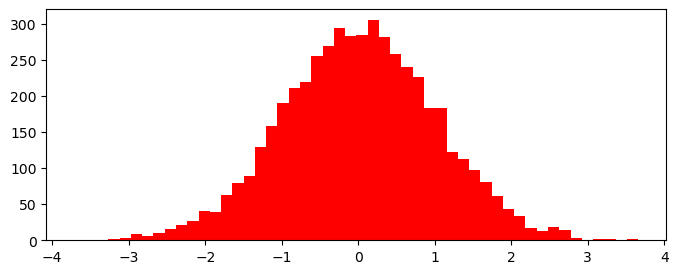

In [16]:
random_numbers = np.random.randn(5000)

fig, ax = plt.subplots(figsize=(8, 3))
ax.hist(random_numbers, 50, color="red", alpha=1)
plt.show()

The second parameter (`bins`) indicates the number of bins. With `rwidth` we can set the relative width of the bars.

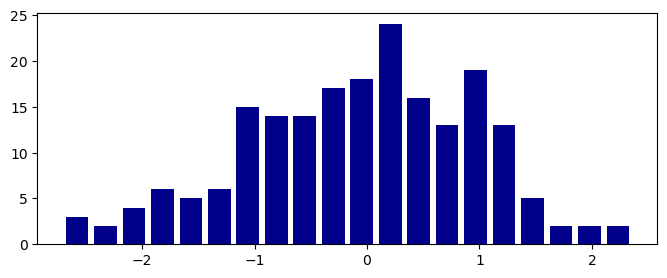

In [17]:
random_numbers = np.random.randn(200)

fig, ax = plt.subplots(figsize=(8, 3))
ax.hist(random_numbers, 20, color="darkblue", rwidth= 0.8, alpha=1)
plt.show()

## Adjusting the graphic
At this point, we see that it is not enough to just display the data somehow.
We always have to think about the layout and format, and *what* exactly is displayed. Perhaps this is still clear to us, since we wrote the code ourselves. But for everyone else, we urgently need suitable axis labels!
### Format and resolution
The format is always defined with `figsize`. This also refers to *inches*, even though we are not at all bound to classic paper dimensions when displaying on screen! The parameter `figsize` is therefore also associated with the parameter `dpi` (for dots-per-inch). To get a better understanding, feel free to play around with different figsize and dpi parameters!
### Axis labeling
In the functional approach, we can label axes using

```python
plt.xlabel(“x axis...”)
plt.ylabel(“y axis...”)
```

In the object-oriented approach used here, on the other hand, we use
```python
ax.set_xlabel(“x axis...”)
ax.set_ylabel(“y axis...”)
```
Similarly, we can also give the graphic a title using set_title().
We can define the displayed area along the x-axis and y-axis using set_xlim() and set_ylim().

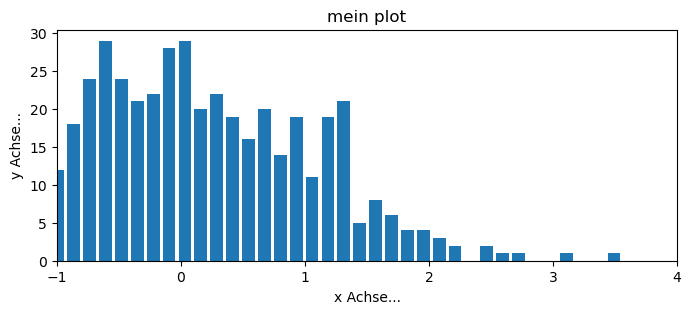

In [ ]:
random_numbers = np.random.randn(500)

fig, ax = plt.subplots(figsize=(8, 3))
ax.hist(random_numbers, 50, rwidth=0.8)

# label axes
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")

# Titel
ax.set_title("my plot")

# selection
ax.set_xlim(-1, 4)
plt.show()

Or, another example for a line plot.

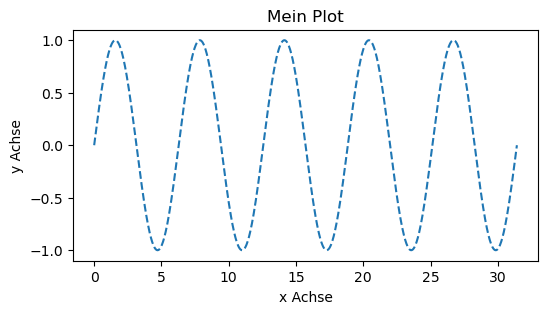

In [ ]:
x = np.linspace(0, 10*np.pi, 1000)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x, y, "--")

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_title("my plot")
plt.show()

### Non-linear axes
In Matplotlib, non-linear axes can of course also be used, e.g. with `.set_yscale()`, something like `log` or `symlog`.

**Question: What does the exponential function look like with a logarithmic y-axis?**

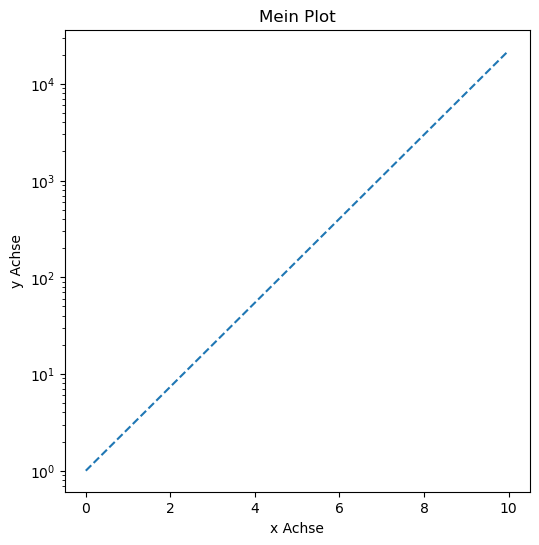

In [ ]:
x = np.linspace(0, 10, 1000)
y = np.exp(x)

fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(x, y, "--")

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_title("my plot")

# Log-Skala:
ax.set_yscale("log")
plt.show()

### Linestyle
With matplotlib, in principle all elements of a graphic can be customized. This means that if we want, we can define the font size, font, color, etc. ourselves. But we can also customize things like the line thickness, line color and line style.
By the way, we add a legend with `.legend()`.

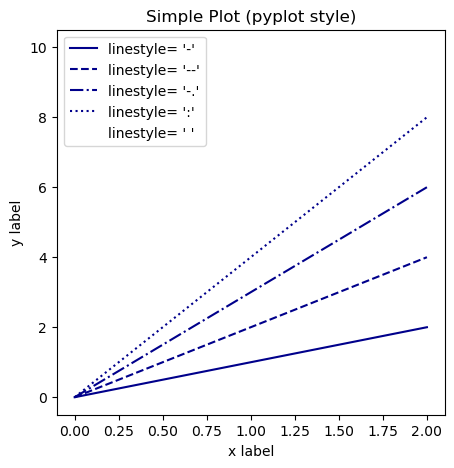

In [23]:
linestyles = ["-", "--", "-.", ":", " "]
x = np.linspace(0, 2, 100)  # Sample data.

fig, ax = plt.subplots(figsize=(5, 5)) #, dpi=90)

for i, linestyle in enumerate(linestyles):
    ax.plot(
        x, (i+1) * x,
        linestyle=linestyle,
        color="darkblue", label=f"linestyle= '{linestyle}'"
    )

ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("Simple Plot (pyplot style)")
ax.legend()
plt.show()

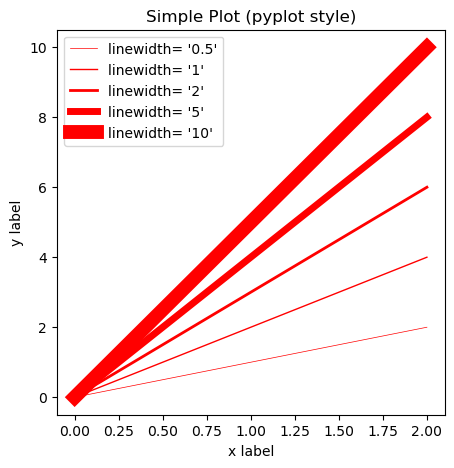

In [24]:
linewidths = [0.5, 1, 2, 5, 10]
x = np.linspace(0, 2, 100)  # Sample data.

fig, ax = plt.subplots(figsize=(5, 5)) #, dpi=90)

for i, linewidth in enumerate(linewidths):
    ax.plot(
        x, (i+1) * x,
        linewidth=linewidth,
        color="r", label=f"linewidth= '{linewidth}'"
    )

ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("Simple Plot (pyplot style)")
ax.legend()
plt.show()

### Markers
There are a lot of different marker symbols to choose from, [see the matplotlib marker overview](https://matplotlib.org/stable/api/markers_api.html?highlight=marker).

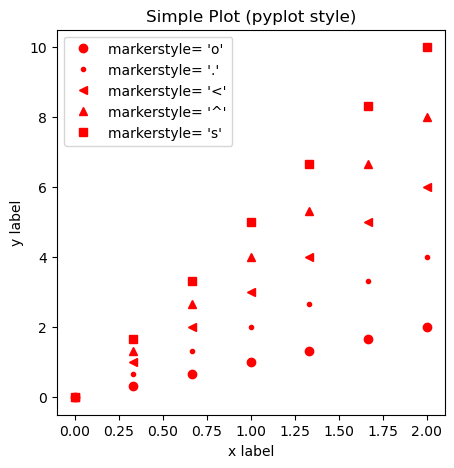

In [25]:
markers = ["o", ".", "<", "^", "s"]
x = np.linspace(0, 2, 7)  # Sample data.

fig, ax = plt.subplots(figsize=(5, 5)) #, dpi=90)

for i, marker in enumerate(markers):
    ax.plot(
        x, (i+1) * x, linestyle="",
        marker=marker,
        color="r",
        label=f"markerstyle= '{marker}'"
    )

ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("Simple Plot (pyplot style)")
ax.legend()
plt.show()

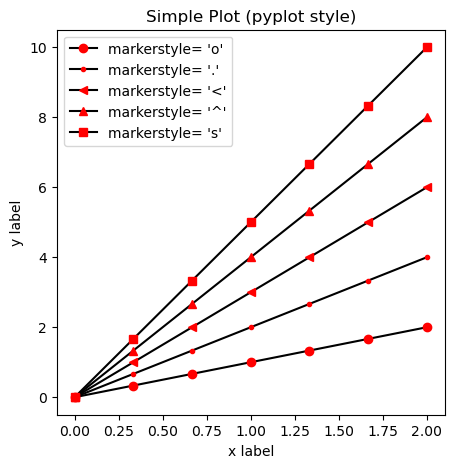

In [26]:
markers = ["o", ".", "<", "^", "s"]
x = np.linspace(0, 2, 7)  # Sample data.

fig, ax = plt.subplots(figsize=(5, 5)) #, dpi=90)

for i, marker in enumerate(markers):
    ax.plot(x, (i+1) * x, linestyle="-", color="black",
             marker=marker, markerfacecolor="r", markeredgecolor="r",
             label=f"markerstyle= '{marker}'")

ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("Simple Plot (pyplot style)")
ax.legend()
plt.show()

### Colors
Colors can be set in various ways in Matplotlib.
+ **Named colors** are colors that Matplotlib “recognizes by name”; see [this list](https://matplotlib.org/stable/gallery/color/named_colors.html).
+ colors can be set via a number tuple, either `(R, G, B)` or `(R, G, B, A)` with Red, Green, Blue, Alpha. Or as `#RRGGBB` with hexadecimal values.


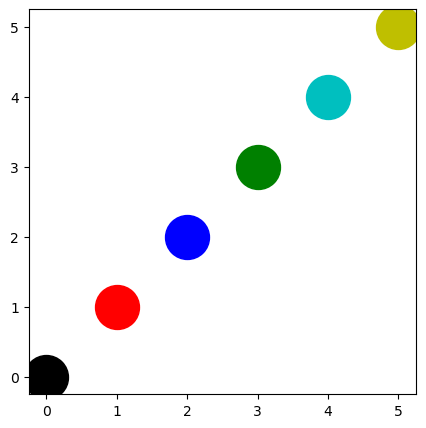

In [44]:
fig, ax = plt.subplots(figsize=(5, 5))
for i, color in enumerate(["k", "r", "b", "g", "c", "y"]):
   ax.scatter(i, i, color=color, s=1000)

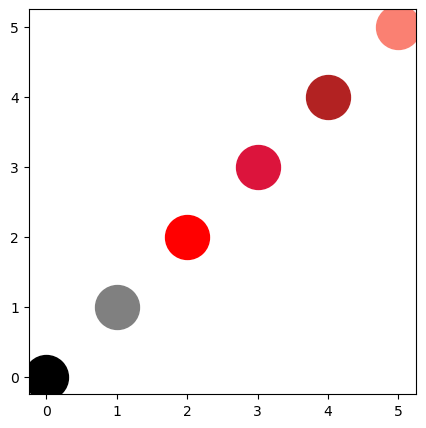

In [45]:
fig, ax = plt.subplots(figsize=(5, 5))
for i, color in enumerate(["black", "gray", "red",
                           "crimson", "firebrick", "salmon"]):
    ax.scatter(i, i, color=color, s=1000)

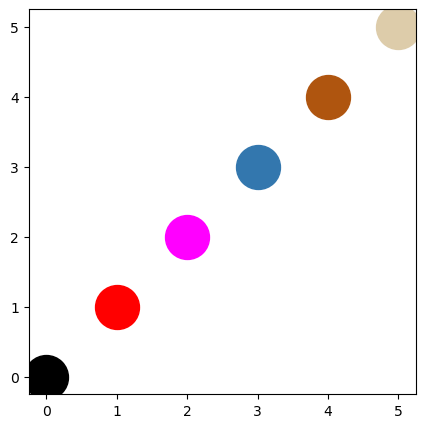

In [46]:
fig, ax = plt.subplots(figsize=(5, 5))
for i, color in enumerate(["#000000", "r", "#FF00FF", "#3377AE", "#AF550F", "#DDCCAA"]):
    ax.scatter(i, i, color=color, s=1000)

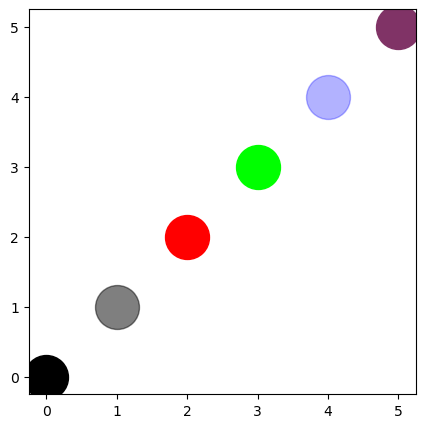

In [47]:
fig, ax = plt.subplots(figsize=(5, 5))
for i, color in enumerate([(0, 0, 0), (0, 0, 0, 0.5), (1, 0, 0), (0, 1, 0), (0, 0, 1, 0.3), (0.5, 0.2, 0.4)]):
    ax.scatter(i, i, color=color, s=1000)

## Symbiois with Pandas (and Seaborn)

In [28]:
import pandas as pd

# More fake data...
df = pd.DataFrame({
    "age": np.random.randint(16, 92, 200),
    "length": (170 + 10 * np.random.randn(200)).astype(int)
})
df

age  length
0     60     172
1     80     167
2     26     171
3     85     176
4     35     160
..   ...     ...
195   39     160
196   74     165
197   54     185
198   41     175
199   58     187

[200 rows x 2 columns]

array([[<Axes: title={'center': 'length'}>]], dtype=object)

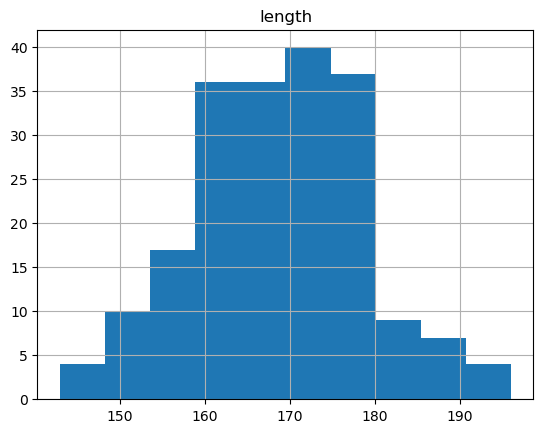

In [37]:
df.hist("length")

# or: df["length"].hist()
# or: df["length"].plot(kind="hist")
# or: df.plot("length", kind="hist")

Pandas allows you to create certain plots extremely quickly (i.e. with little code) based on an existing dataframe. Since matplotlib is used internally for this, we can also pass the parameters used in matplotlib to pandas.

array([[<Axes: title={'center': 'length'}>]], dtype=object)

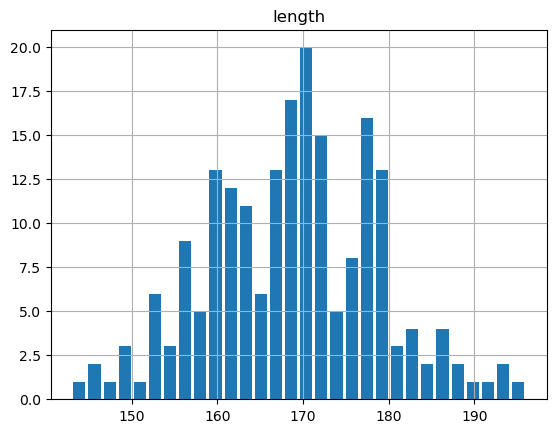

In [39]:
df.hist("length", bins=30, rwidth=0.8)

But we can also continue to work with it as a Matplotlib Figure (because that's exactly what is actually returned by Pandas!).

(160.0, 200.0)

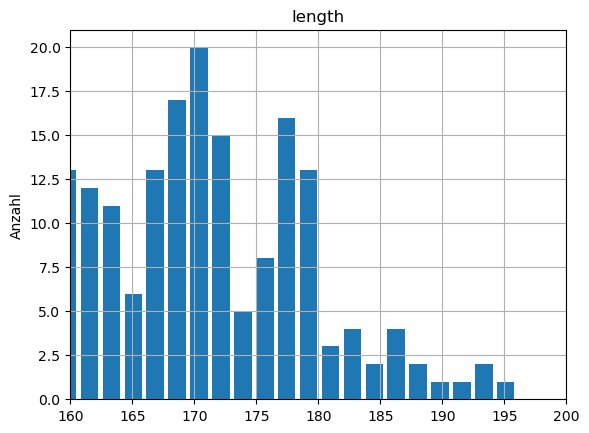

In [40]:
df.hist("length", bins=30, rwidth=0.8)
plt.ylabel("Anzahl")
plt.xlim(160,200)

For more complex customizations, however, it may be a good idea to switch back to the object-oriented approach.

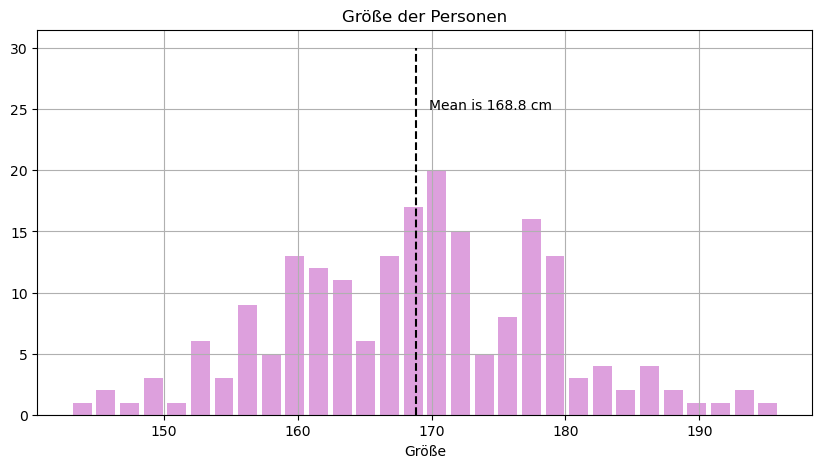

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))

df["length"].hist(bins=30, rwidth=0.8, color="plum", ax=ax)

# Anpassungen in Matplotlib
ax.set_title("Größe der Personen")
ax.set_xlabel("Größe")

mean_length = df["length"].mean()
ax.vlines(
    mean_length, 0, 30,
    linestyle="--", color="black"
)
ax.text(
    mean_length + 1, 25,
    f"Mean is {mean_length:.1f} cm"
)
plt.show()

## Subplots - combining multiple plots
Again, there are two options as described above: (1) via pyplot or (2) object-oriented. At the latest here, however, the object-oriented approach becomes much clearer.

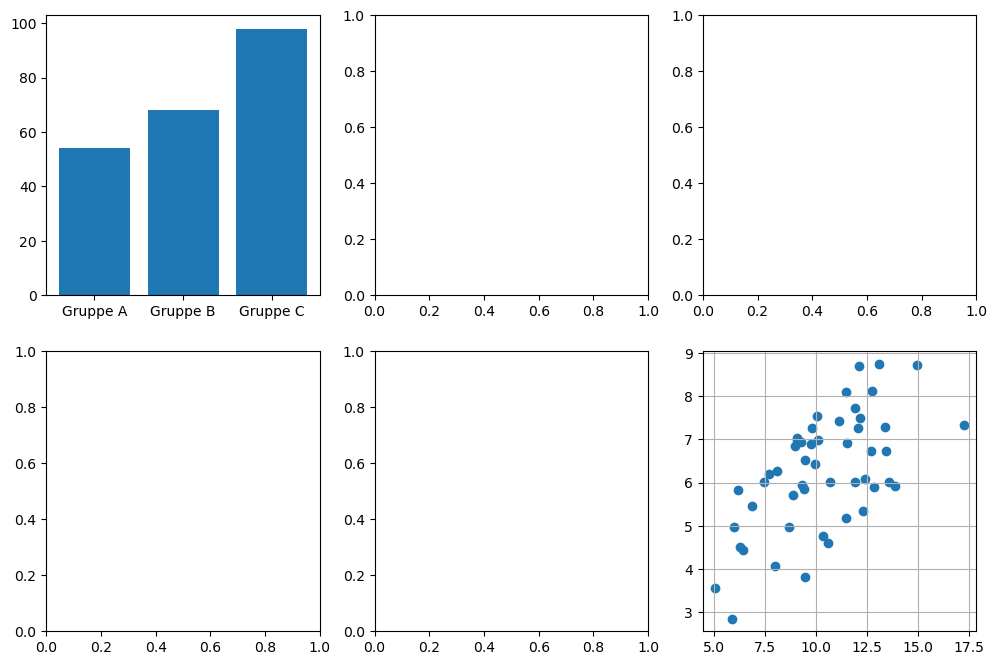

In [48]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs[0, 0].bar(names, values)
axs[1, 2].scatter(temperature, sunshine)
axs[1, 2].grid(True)
plt.show()

The individual subplots can also be customized using the “*pyplot-style*”.  
To do this, you can refer to/work through the matplotlib [pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py).
For complex plots (with many subplots), however, the object-oriented interface is usually clearer.
Somewhat confusingly, the method names differ in the two cases, typically as follows:
`plt.xlabel(“whatever”)` vs. `ax.set_xlabel(“whatever”)`  
`plt.title(“whatever”)` vs. `ax.set_title(“whatever”)`

### Shared axes
With the object-oriented approach, two different quantities can also be plotted in one shared-axis plot.

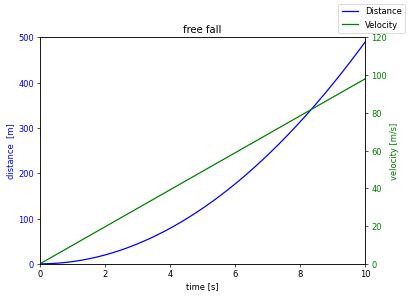

In [ ]:
# Freier Fall
time = np.arange(0, 10, 0.01)
g = 9.81  # m/s^2
velocity = g * time
distance = 0.5 * g * time ** 2

# Plot
fig, ax1 = plt.subplots(figsize=(7, 5), dpi=60)

# ax1
ax1.plot(time, distance, "blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylabel("distance  [m]", color="blue")
ax1.set_xlabel("time [s]")
ax1.set_ylim(0, 500)

# ax2
ax2 = ax1.twinx() # Erzeug ein weiteres Axes-Objekt das sich mit ax1 die x-axis teilt
ax2.plot(time, velocity, "green")
ax2.set_ylabel("velocity [m/s]", color="green")
ax2.tick_params(axis="y", labelcolor="green")
ax2.set_ylim(0, 120)
ax1.set_xlim(0, 10)

fig.legend(["Distance", "Velocity"])
plt.title("free fall")
plt.show()

### Creating plots using loops
With the object-oriented interface, it is also possible to create many plots using one or more `for` loops.
To do this, we run the loop over the different `axes` as in the following example:

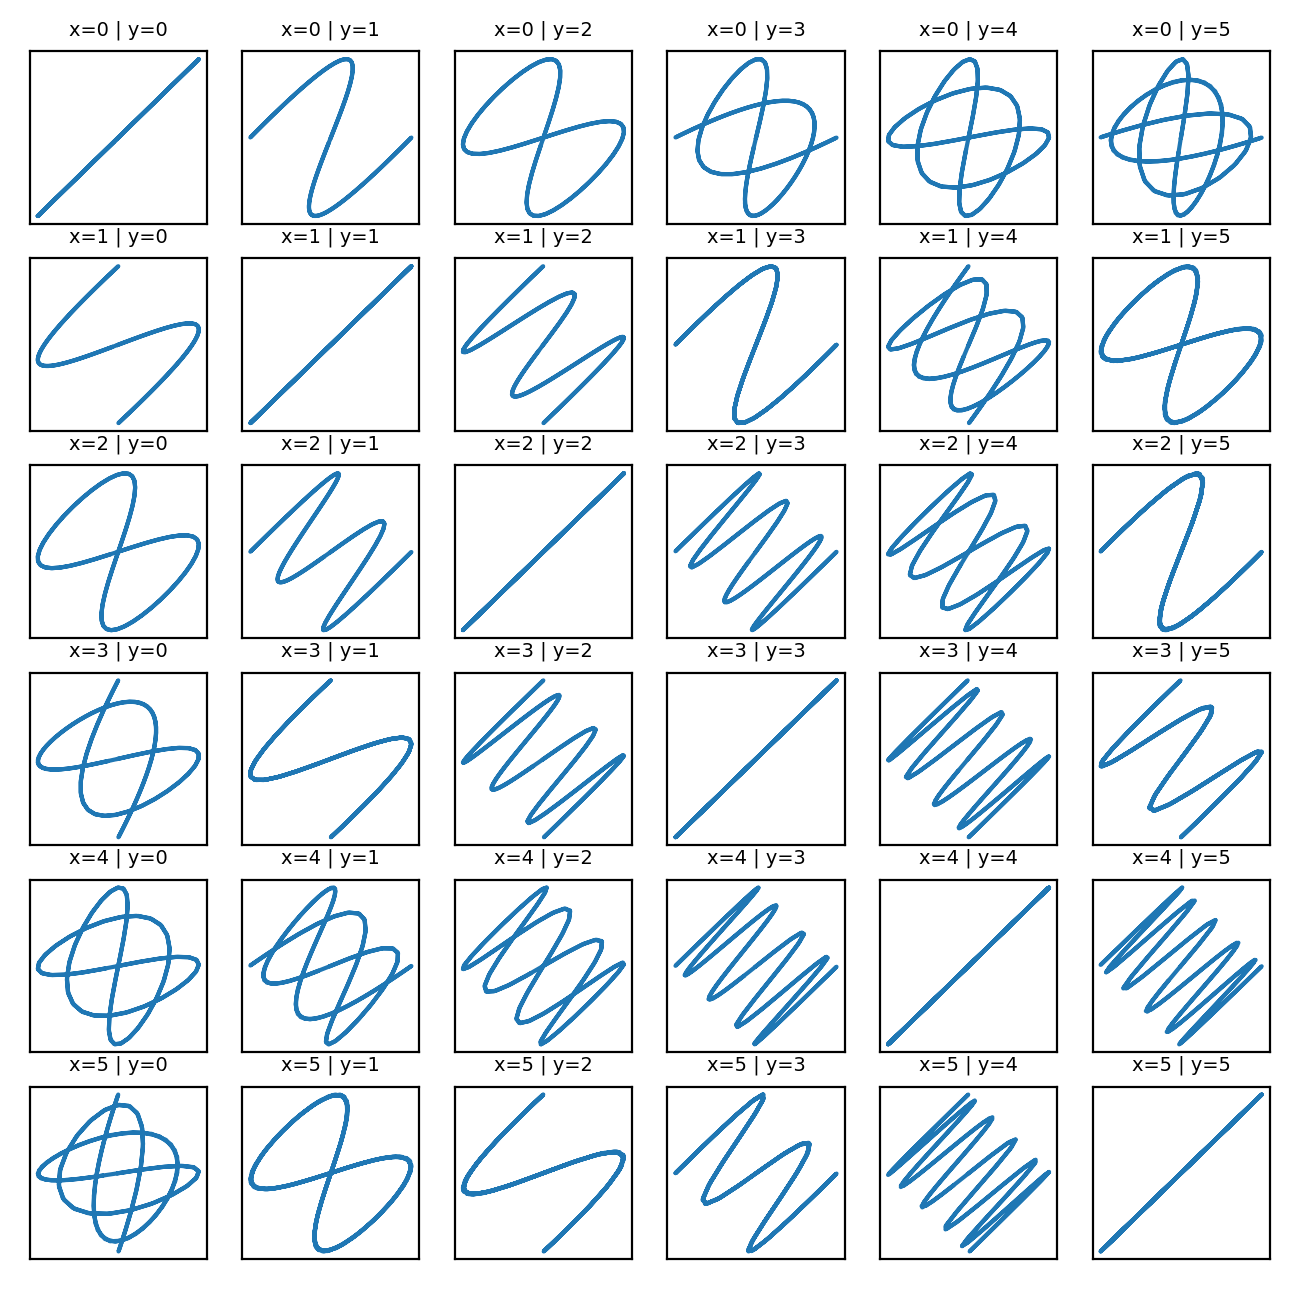

In [80]:
def squiggle_xy(a, b, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.cos(i*a)*np.sin(i*b)

dim_x = 6
dim_y = 6
fig, axs = plt.subplots(dim_x, dim_y, figsize=(8, 8), dpi=200)

for x in range(dim_x):
    for y in range(dim_y):
        axs[x, y].plot(*squiggle_xy(x + 1, y + 1))
        axs[x, y].set(xticks=[], yticks=[])
        axs[x, y].set_title(f"x={x} | y={y}", fontsize=7)

plt.show()